In [2]:
# assign precipitation measurements to each SLC 
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime, timedelta
#from datetime import timedelta
#from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.ndimage import gaussian_filter, uniform_filter
%matplotlib  widget

In [3]:
# how many dates do we have? 
workdir = '/data/ocp4/LagunaSalada/'
#cropdir='cropped_9000_20_10000_1780/'
cropdir='cropped_9000_1800_18000_3600/'

dates = [os.path.basename(x) for x in glob.glob(workdir+cropdir+"SLC_vv/2*")]
dates=sorted(dates)
nd=len(dates)

# convert date strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))
print(str(len(slc_dates))+' SLC dates') 
    
# Read in precipitation data 
precip = np.loadtxt('precip.txt', delimiter=',', skiprows=3, dtype=str)
precipDates = precip[:,0]; precip = precip[:,1]
precip = precip.astype(float)
# convert to cm from inches 
precip = precip*2.54

# make the dates from precip.txt into datetime objects
precip_dates=[]
for i in range(0,len(precipDates)):
    precip_dates.append(datetime.strptime(str(precipDates[i]).replace('\n',''), '%Y-%m-%d'))
print(str(len(precip_dates))+' precip dates') 

211 SLC dates
1714 precip dates


In [4]:
# CUMULATIVE UP TO SLC DATE
# initiate empty matrix 
precip_cumulative = np.zeros(len(slc_dates))
# counter 
n=0
# loop through SLC dates
for i in range(len(slc_dates)):
    # cumulative precip value initial
    cp = 0
    while n < len(precip_dates) and precip_dates[n] <= slc_dates[i]:
        if np.isnan(precip[n]):
            # don't add it if it's a nan, skip to next entry
            n +=1
        else:
            cp += precip[n]
            n +=1
        precip_cumulative[i]=cp
        #print('slc='+str(slc_dates[i].strftime('%Y-%m-%d'))+'\t precipdate='+ \
        #      str(precip_dates[n].strftime('%Y-%m-%d'))+'\t cp='+str(cp)+'\t n='+str(n))  

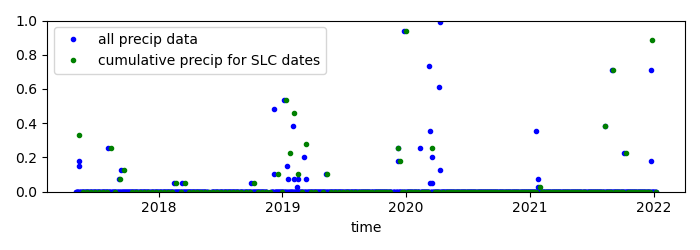

In [11]:
# plot it over time 
plt.figure(figsize=(7, 2.5), tight_layout=True)
plt.xlabel('time')
plt.plot(precip_dates,precip,'.b',label='all precip data')
plt.plot(slc_dates,precip_cumulative,'.g',label='cumulative precip for SLC dates')
plt.ylim([0,1])
plt.legend(loc='upper left')
plt.show()
# THIS LOOKS RIGHT!

In [20]:
# PRECIP ON DAY BEFORE + DAY OF the SLC
# initiate empty matrix 
precip_2days = np.zeros(len(slc_dates))
# make a counter
n = 0
# loop through SLC dates
for i in range(len(precip_dates)):
    # where the slc_dates value equals the precip_dates value, 
    # add data from previous day and day of and put it in precip_2days
    if precip_dates[i] == slc_dates[n]:
        # nansum has to take an array so I put them into an array
        p = [precip[i],precip[i-1]]
        # make it ignore nans unless both values are nans
        precip_2days[n] = np.nansum(p)
        n += 1
        #print(p)
#print(precip_2days)


[0.3302 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     5.0546 0.     0.
 0.     0.     0.     0.     0.     0.0762 0.     0.     0.     0.1016
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     1.4478 0.     0.     0.     0.     0.
 0.     0.     0.     2.286  0.     0.     0.254  0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     1.1684 0.     0.
 0.     0.     0.4064 0.254  0.     0.     0.     0.9906 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0

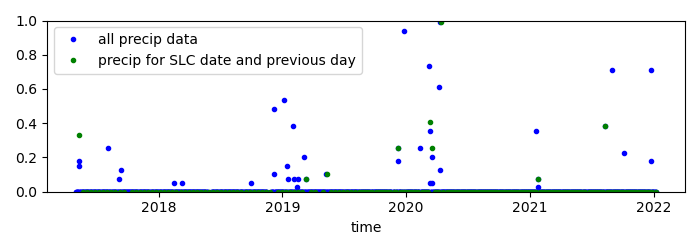

In [21]:
# plot it over time 
plt.figure(figsize=(7, 2.5), tight_layout=True)
plt.xlabel('time')
plt.plot(precip_dates,precip,'.b',label='all precip data')
plt.plot(slc_dates,precip_2days,'.g',label='precip for SLC date and previous day')
plt.ylim([0,1])
plt.legend(loc='upper left')
plt.show()
# THIS LOOKS RIGHT!
        

In [22]:
# put it into a file 
file = open("precip_2days.txt", "w+")
for i in range(len(precip_2days)):
    file.write(str(precip_2days[i])+'\n')
file.close()